# German tank problem

In WWII, the allies used this method to approximate how many tanks German had. Germans used discrete serial numbers on their tanks and the Allies observed these numbers on captured tanks. The statisticans believed that Germans numbered their tanks in the order they were produced so they built a model to approximate the total number of tanks rolling out of German factories.

## Data generation
To simulate this case, let's first choose a value to be the true value of total number of tanks.
Based on the chosen true value, next we generate the dataset of observations.

In [29]:
# This value is hidden from us
# We try to estimate this number based on the data we generate from this
true_total_number = 1000

In [30]:
import pymc3 as pm
import numpy as np
import arviz as az

In [31]:
observed_tank_count = 20
# + 1 is here to make the range inclusive
# Use choice function to force unique numbers (replace = False)
observations = np.random.choice(np.arange(1, true_total_number + 1), observed_tank_count, replace=False)

observations

array([805, 529, 261,  59, 498, 846, 297, 396, 144, 400, 977, 107, 532,
       487, 452, 390, 304,  31,  73, 973])

## Model
Based on the observations, let's build the actual model to estimate the total count of the produced tanks.

In [32]:
with pm.Model() as model:
	# Prior for the total count
	# The largest observation tells us how many tanks there at least have to be
	# Upper limit is our own estimation how many tanks there could be
	# 10 000 is large enough to cover all the at least somewhat possible maximum counts for the tanks
	prior_total_count = pm.DiscreteUniform('total_count', np.max(observations), 10000)
	likelihood_total_count = pm.DiscreteUniform('observed', 1, prior_total_count, observed=observations)
	posterior = pm.sample(10000)


<ipython-input-32-8be6946bfa95>:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  posterior = pm.sample(10000)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [total_count]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 4 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [33]:
az.summary(posterior)

/home/late/anaconda3/envs/datascience/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
total_count,1030.169,55.953,977.0,1129.0,1.014,0.717,2657.0,2432.0,1.0


/home/late/anaconda3/envs/datascience/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'total_count'}>

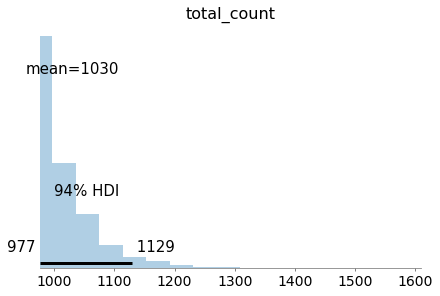

In [34]:
az.plot_posterior(posterior)

## Results
With 20 observed tank serial numbers, we built a model which simulated the same scenario 10 000 times. Based on those simulations, the mean of the total tank count is 1030. This is just a point estimate which ignores the uncertainty completely.

The more appropriate way to interpret is to look at the posterior distribution as a whole. 94% of the simulation results are captured between 977 and 1129 tanks. This is a decent probability one could bet for. With this distribution we can also prepare for the worst case scenarios. For example, there's a little chance that there could be over 1200 tanks, how would we deal with such a scenario in our defence?